In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
data = pd.read_csv('steam.csv')
data.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             27075 non-null  int64  
 1   name              27075 non-null  object 
 2   release_date      27075 non-null  object 
 3   english           27075 non-null  int64  
 4   developer         27074 non-null  object 
 5   publisher         27061 non-null  object 
 6   platforms         27075 non-null  object 
 7   required_age      27075 non-null  int64  
 8   categories        27075 non-null  object 
 9   genres            27075 non-null  object 
 10  steamspy_tags     27075 non-null  object 
 11  achievements      27075 non-null  int64  
 12  positive_ratings  27075 non-null  int64  
 13  negative_ratings  27075 non-null  int64  
 14  average_playtime  27075 non-null  int64  
 15  median_playtime   27075 non-null  int64  
 16  owners            27075 non-null  object

In [ ]:
print(data.describe())

              appid       english  required_age  achievements  \
count  2.707500e+04  27075.000000  27075.000000  27075.000000   
mean   5.962035e+05      0.981127      0.354903     45.248864   
std    2.508942e+05      0.136081      2.406044    352.670281   
min    1.000000e+01      0.000000      0.000000      0.000000   
25%    4.012300e+05      1.000000      0.000000      0.000000   
50%    5.990700e+05      1.000000      0.000000      7.000000   
75%    7.987600e+05      1.000000      0.000000     23.000000   
max    1.069460e+06      1.000000     18.000000   9821.000000   

       positive_ratings  negative_ratings  average_playtime  median_playtime  \
count      2.707500e+04      27075.000000      27075.000000      27075.00000   
mean       1.000559e+03        211.027147        149.804949        146.05603   
std        1.898872e+04       4284.938531       1827.038141       2353.88008   
min        0.000000e+00          0.000000          0.000000          0.00000   
25%        6.0

In [ ]:
print(data.isnull().sum())

data['developer'].fillna('Desconocido', inplace=True)

appid                0
name                 0
release_date         0
english              0
developer            1
publisher           14
platforms            0
required_age         0
categories           0
genres               0
steamspy_tags        0
achievements         0
positive_ratings     0
negative_ratings     0
average_playtime     0
median_playtime      0
owners               0
price                0
dtype: int64


In [ ]:
columns_to_drop = ['developer', 'publisher', 'platforms',"appid", 'required_age', 'categories', 'steamspy_tags', 'achievements']
data_filtered = data.drop(columns=columns_to_drop)

print(data_filtered.head())

                        name release_date  english  genres  positive_ratings  \
0             Counter-Strike   2000-11-01        1  Action            124534   
1      Team Fortress Classic   1999-04-01        1  Action              3318   
2              Day of Defeat   2003-05-01        1  Action              3416   
3         Deathmatch Classic   2001-06-01        1  Action              1273   
4  Half-Life: Opposing Force   1999-11-01        1  Action              5250   

   negative_ratings  average_playtime  median_playtime             owners  \
0              3339             17612              317  10000000-20000000   
1               633               277               62   5000000-10000000   
2               398               187               34   5000000-10000000   
3               267               258              184   5000000-10000000   
4               288               624              415   5000000-10000000   

   price  
0   7.19  
1   3.99  
2   3.99  
3   3.99  
4

In [ ]:
print(data_filtered.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              27075 non-null  object 
 1   release_date      27075 non-null  object 
 2   english           27075 non-null  int64  
 3   genres            27075 non-null  object 
 4   positive_ratings  27075 non-null  int64  
 5   negative_ratings  27075 non-null  int64  
 6   average_playtime  27075 non-null  int64  
 7   median_playtime   27075 non-null  int64  
 8   owners            27075 non-null  object 
 9   price             27075 non-null  float64
dtypes: float64(1), int64(5), object(4)
memory usage: 2.1+ MB
None


In [ ]:
def convert_owners_to_number(owners_str):
    if '-' in owners_str:
        low, high = owners_str.split('-')
        return (int(low) + int(high)) // 2
    else:
        return int(owners_str)

data_filtered['owners'] = data_filtered['owners'].apply(convert_owners_to_number)

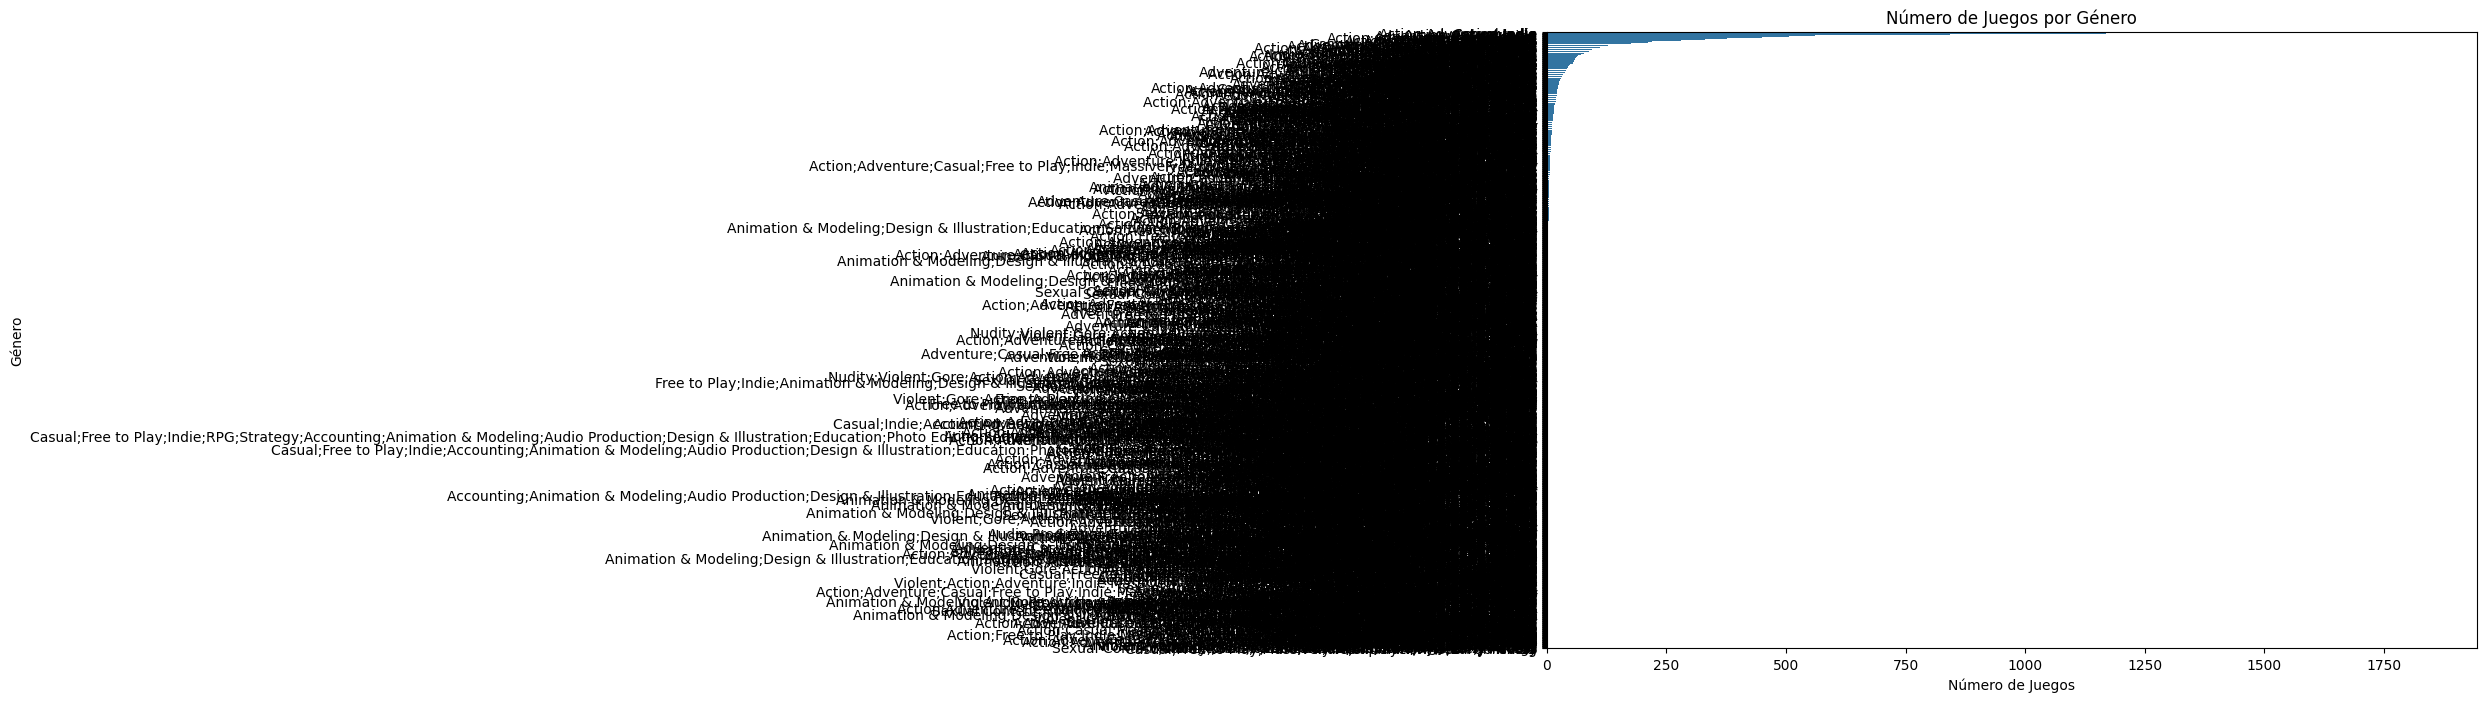

In [ ]:
# Gráfico de barras para el número de juegos por género
plt.figure(figsize=(12, 8))
sns.countplot(data=data_filtered, y="genres", order=data_filtered["genres"].value_counts().index)
plt.title('Número de Juegos por Género')
plt.xlabel('Número de Juegos')
plt.ylabel('Género')
plt.show()

In [ ]:
genre_column = data_filtered['genres']
print(genre_column)

0                        Action
1                        Action
2                        Action
3                        Action
4                        Action
                  ...          
27070    Adventure;Casual;Indie
27071    Action;Adventure;Indie
27072       Action;Casual;Indie
27073    Adventure;Casual;Indie
27074    Adventure;Casual;Indie
Name: genres, Length: 27075, dtype: object


In [ ]:
data_filtered['genres'] = data_filtered['genres'].apply(lambda x: x.split(';')[0])

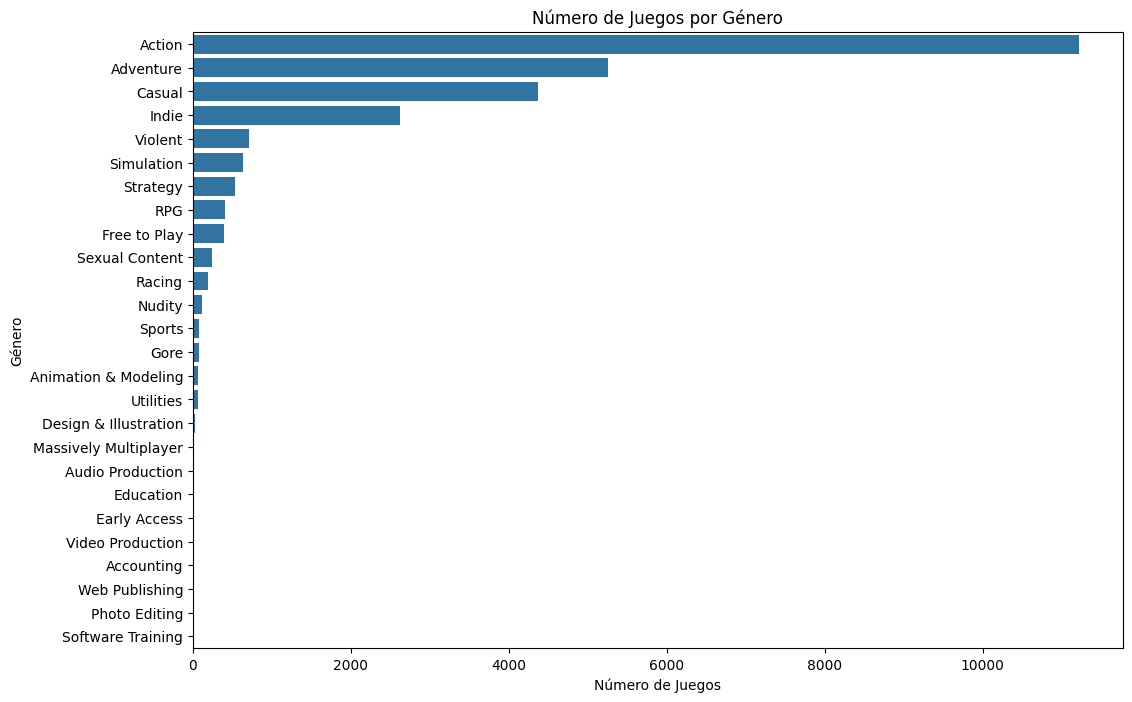

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(data=data_filtered, y='genres', order=data_filtered['genres'].value_counts().index)
plt.title('Número de Juegos por Género')
plt.xlabel('Número de Juegos')
plt.ylabel('Género')
plt.show()

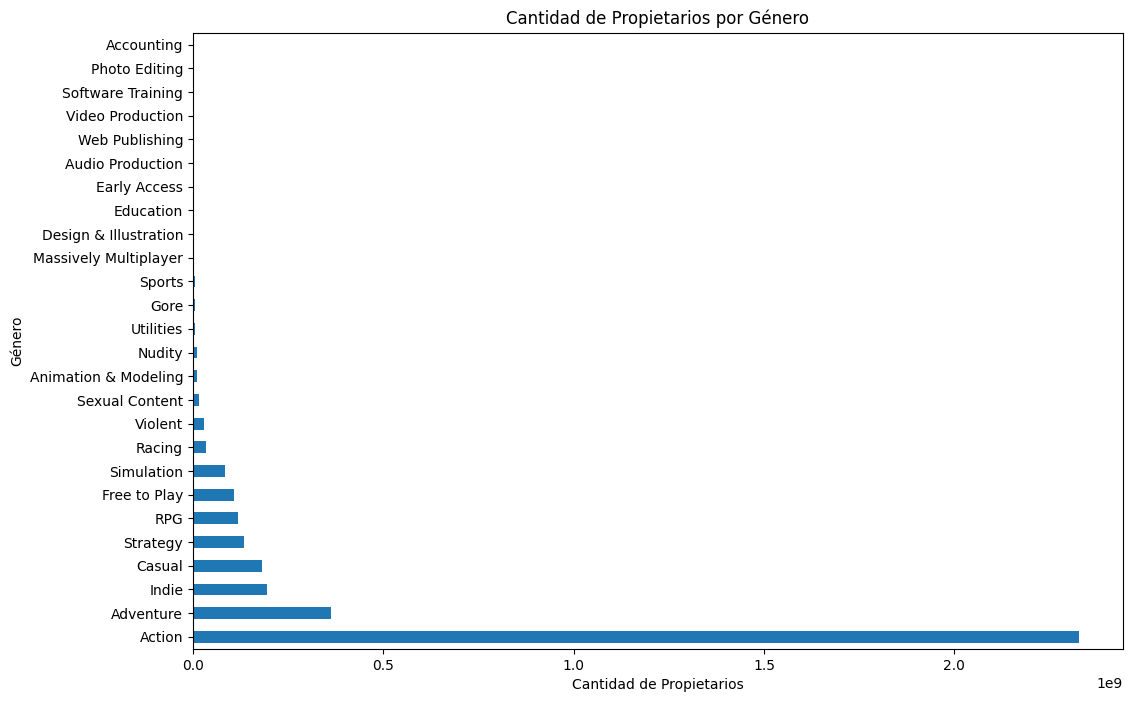

In [ ]:
owners_by_genre = data_filtered.groupby('genres')['owners'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
owners_by_genre.plot(kind='barh')
plt.title('Cantidad de Propietarios por Género')
plt.xlabel('Cantidad de Propietarios')
plt.ylabel('Género')
plt.show()

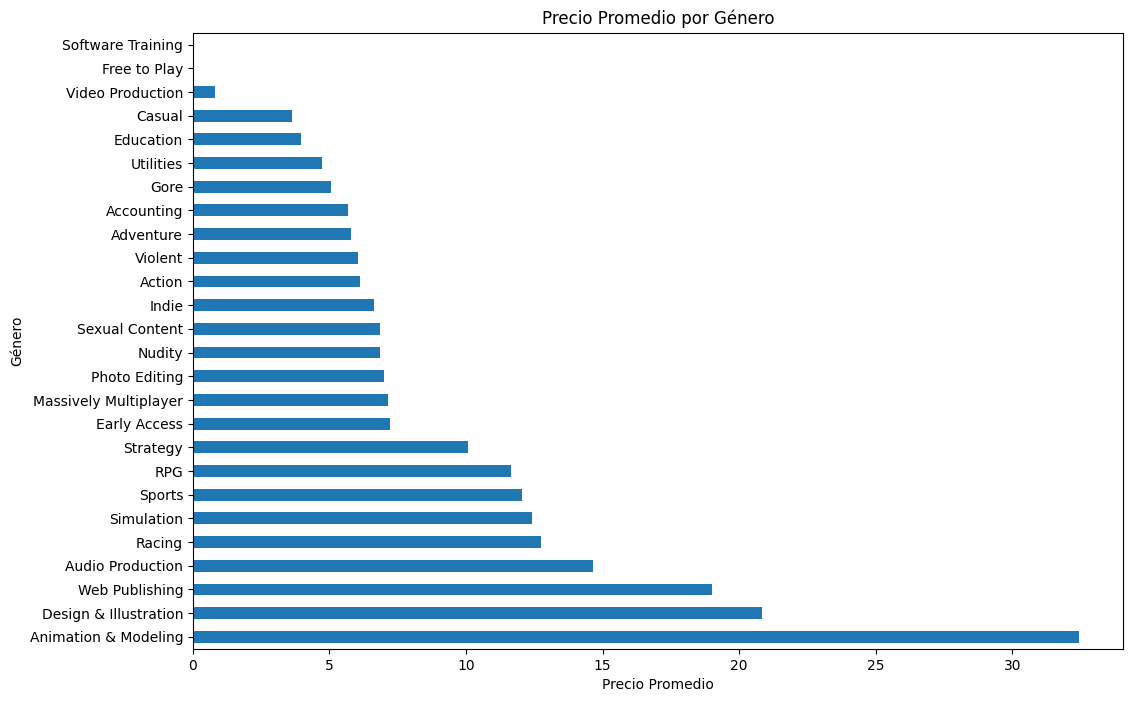

In [ ]:
average_price_by_genre = data_filtered.groupby('genres')['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
average_price_by_genre.plot(kind='barh')
plt.title('Precio Promedio por Género')
plt.xlabel('Precio Promedio')
plt.ylabel('Género')
plt.show()

In [ ]:
data_filtered['genres'] = data['genres']
data_filtered['genres'] = data_filtered['genres'].apply(lambda x: x.split(';')[:3])
print(data_filtered)

                             name release_date  english  \
0                  Counter-Strike   2000-11-01        1   
1           Team Fortress Classic   1999-04-01        1   
2                   Day of Defeat   2003-05-01        1   
3              Deathmatch Classic   2001-06-01        1   
4       Half-Life: Opposing Force   1999-11-01        1   
...                           ...          ...      ...   
27070             Room of Pandora   2019-04-24        1   
27071                   Cyber Gun   2019-04-23        1   
27072            Super Star Blast   2019-04-24        1   
27073  New Yankee 7: Deer Hunters   2019-04-17        1   
27074                   Rune Lord   2019-04-24        1   

                           genres  positive_ratings  negative_ratings  \
0                        [Action]            124534              3339   
1                        [Action]              3318               633   
2                        [Action]              3416               398   

combined_genres
Action;Adventure;Indie     2276
Action;Indie               1852
Action;Casual;Indie        1682
Casual;Indie               1482
Adventure;Casual;Indie     1452
Action;Adventure;Casual    1207
Adventure;Indie            1170
Action                      843
Indie                       759
Casual;Indie;Simulation     709
Adventure;Indie;RPG         636
Casual                      560
Adventure                   535
Adventure;Casual            506
Strategy                    485
Name: count, dtype: int64


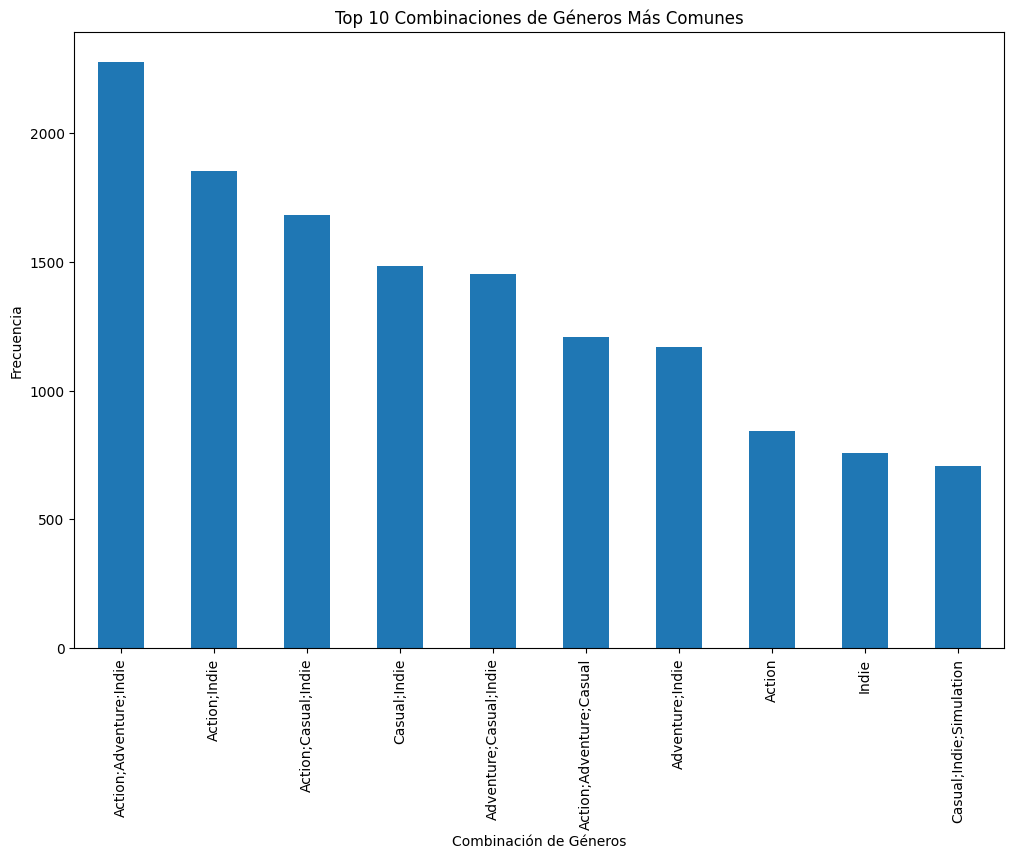

In [ ]:
data_filtered['combined_genres'] = data_filtered['genres'].apply(lambda x: ';'.join(x))

genre_combinations = data_filtered['combined_genres'].value_counts()

print(genre_combinations.head(15))

plt.figure(figsize=(12, 8))
genre_combinations.head(10).plot(kind='bar')
plt.title('Top 10 Combinaciones de Géneros Más Comunes')
plt.xlabel('Combinación de Géneros')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Create a OneHotEncoder object
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit the encoder on the 'combined_genres' column and transform it
encoded_genres = encoder.fit_transform(data_filtered[['combined_genres']])

# Create a new DataFrame with the encoded genres
encoded_df = pd.DataFrame(encoded_genres)

# Concatenate the encoded genres with the other numerical features
X_clustering = pd.concat([data_filtered[['positive_ratings', 'negative_ratings', 'average_playtime', 'median_playtime']], encoded_df], axis=1)

# Convert all column names to strings
X_clustering.columns = X_clustering.columns.astype(str)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
data_filtered['cluster'] = kmeans.fit_predict(X_clustering)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


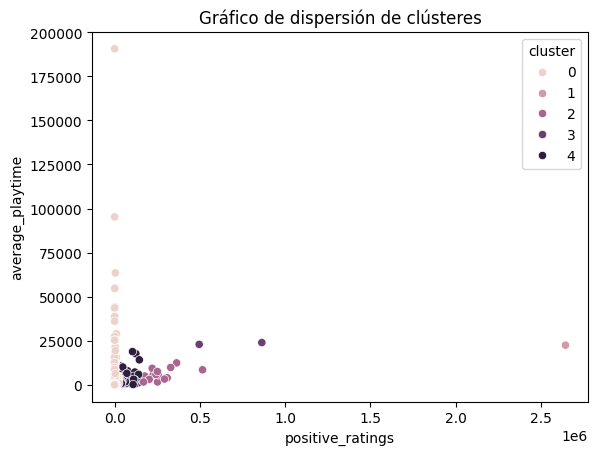

In [ ]:
sns.scatterplot(x='positive_ratings', y='average_playtime', hue='cluster', data=data_filtered) # Replace 'columna1' and 'columna2' with actual column names from your DataFrame
plt.title('Gráfico de dispersión de clústeres')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar regresión lineal
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f'Linear Regression RMSE: {rmse}')
print(f'Linear Regression R^2: {r2}')

Linear Regression RMSE: 10.292054899978195
Linear Regression R^2: -0.031469778123434544
